On the other hand, surely pens are just pens, no matter what your language compels you
to specify about them? As an English
speaker, you only have to count them and give the number.


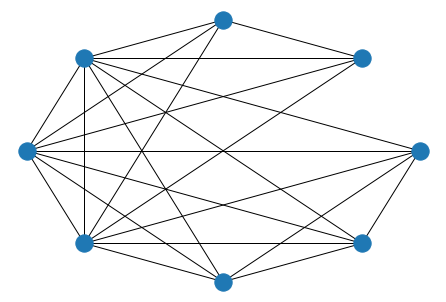

In [6]:
import numpy as np
import sys
# import matplotlib.pyplot as plt
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

def tokenize(document):
    doc_tokenizer = PunktSentenceTokenizer()
    return doc_tokenizer.tokenize(document)

document = '''At first glance the idea seems perfectly plausible. Conveying
even simple messages requires that you make completely different observations depending
on your language. Imagine being asked to count some pens on a table. As an English
speaker, you only have to count them and give the number. But a Russian may need to
consider the gender and a Japanese speaker has to take into account their shape (long
and cylindrical) as well, and use the number word designated for items of that shape.
On the other hand, surely pens are just pens, no matter what your language compels you
to specify about them? Little linguistic peculiarities, though amusing, don’t change the
objective world we are describing. So how can they alter the way we think?'''

sentences_list = tokenize(document)
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)
cv_demo = CountVectorizer()
text_demo = ["Ashish is good, you are bad", "I am not bad"]
res_demo = cv_demo.fit_transform(text_demo)
# print('Result demo array is {}'.format(res_demo.toarray()))
# print('Feature list: {}'.format(cv_demo.get_feature_names()))
# print('The data type of bow matrix {}'.format(type(cv_matrix)))
# print('Shape of the matrix {}'.format(cv_matrix.get_shape))
# print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
# print(cv.get_feature_names())
# print(cv_matrix.toarray())
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
# print(normal_matrix.toarray())
# print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
ranks = nx.pagerank(nx_graph)
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])
temp_array = []
flag = 0

if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))
threshold = (sum(temp_array) / len(temp_array)) + 0.2

sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
            sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

model = sentence_list

summary = " ".join(str(x) for x in sentence_list)
print(summary)